In [23]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import shapiro
from scipy.stats import lognorm
from scipy.stats.stats import pearsonr
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:

path = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\preprocessed_df.csv"
total_df = pd.read_csv(path)
print(total_df.shape)
total_df.head()

(1243, 12)


,material_description,material_price,vendor,location,dow,zip,region,date,raw_material,steel_price,copper_price,target_price
0,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,7.22,homedepot,"2455 Paces Ferry Rd SE. Atlanta, GA, 30339",Thursday,30339,southeast,2022-10-20,steel,1500.53,7585.5,high price
1,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,5.99,lowes,"1000 Lowe's Blvd. Mooresville, NC, 28117",Thursday,28117,east,2022-10-20,steel,1500.53,7585.5,about average
2,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,4.73,gordonelectricsupply,"1290 N Hobbie Ave. Kankakee, Illinois, 60901",Thursday,60901,central,2022-10-20,steel,1500.53,7585.5,low price
3,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,5.88,supplyworks,"6260 Abbott Dr. Omaha, Nebraska, 68110",Thursday,68110,central,2022-10-20,steel,1500.53,7585.5,low price
4,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,9.09,ebay,"2025 Hamilton Avenue. San Jose, California, 95125",Thursday,95125,west,2022-10-20,steel,1500.53,7585.5,high price


In [25]:
# Create Encoding

le = LabelEncoder()
encoded_df = total_df
encoded_df['vendor'] = le.fit_transform(total_df['vendor'])
encoded_df['dow'] = le.fit_transform(total_df['dow'])
encoded_df['region'] = le.fit_transform(total_df['region'])
encoded_df['target_price'] = le.fit_transform(total_df['target_price'])
encoded_df['material_description'] = le.fit_transform(total_df['material_description'])
encoded_df['date'] = le.fit_transform(total_df['date'])
encoded_df['raw_material'] = le.fit_transform(total_df['target_price'])
encoded_df['steel_price'] = le.fit_transform(total_df['material_description'])
encoded_df['copper_price'] = le.fit_transform(total_df['date'])
encoded_df = encoded_df.drop(columns=["location", "zip"])
encoded_df.head()

,material_description,material_price,vendor,dow,region,date,raw_material,steel_price,copper_price,target_price
0,5,7.22,12,4,7,0,1,5,0,1
1,5,5.99,16,4,1,0,0,5,0,0
2,5,4.73,11,4,0,0,2,5,0,2
3,5,5.88,25,4,0,0,2,5,0,2
4,5,9.09,9,4,8,0,1,5,0,1


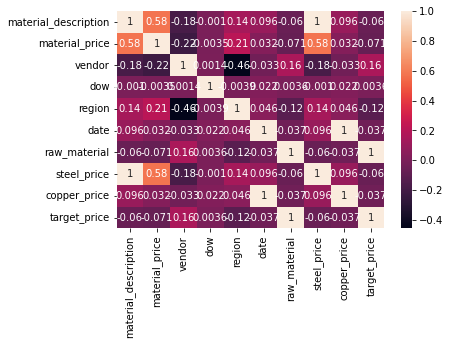

In [26]:
# Create Correlation Matrix

corr_matrix = encoded_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [27]:
# Create bolean target by getting rid of 'about average' values

encoded_df = encoded_df[encoded_df.target_price != 0]
encoded_df.head()

,material_description,material_price,vendor,dow,region,date,raw_material,steel_price,copper_price,target_price
0,5,7.22,12,4,7,0,1,5,0,1
2,5,4.73,11,4,0,0,2,5,0,2
3,5,5.88,25,4,0,0,2,5,0,2
4,5,9.09,9,4,8,0,1,5,0,1
5,12,11.91,12,4,7,0,1,12,0,1


In [28]:
# Define the features set.
X = encoded_df.copy()
X = X.drop(['target_price', 'material_price', 'material_description', 'copper_price', 'steel_price', 'date', 'raw_material'], axis=1)
X.head()

,vendor,dow,region
0,12,4,7
2,11,4,0
3,25,4,0
4,9,4,8
5,12,4,7


In [29]:
# Define the target set. 1 = 'high price' and 2 = 'low price'

y = encoded_df['target_price'].values
y[:5]

array([1, 2, 2, 1, 1])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(736, 3)
(246, 3)
(736,)
(246,)


In [31]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)
predictions

array([2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 2, 1])

In [32]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 2", "Actual 1"], columns=["Predicted 2", "Predicted 1"])

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
cm_df

,Predicted 2,Predicted 1
Actual 2,96,40
Actual 1,40,70


In [33]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 2,Predicted 1
Actual 2,96,40
Actual 1,40,70


Accuracy Score : 0.6747967479674797
Classification Report
              precision    recall  f1-score   support

           1       0.71      0.71      0.71       136
           2       0.64      0.64      0.64       110

    accuracy                           0.67       246
   macro avg       0.67      0.67      0.67       246
weighted avg       0.67      0.67      0.67       246

